/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_11168/4268053867.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all_sessions['mean_hr'].fillna(df_all_sessions['mean_hr'].mean(), inplace=True)
/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_11168/4268053867.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

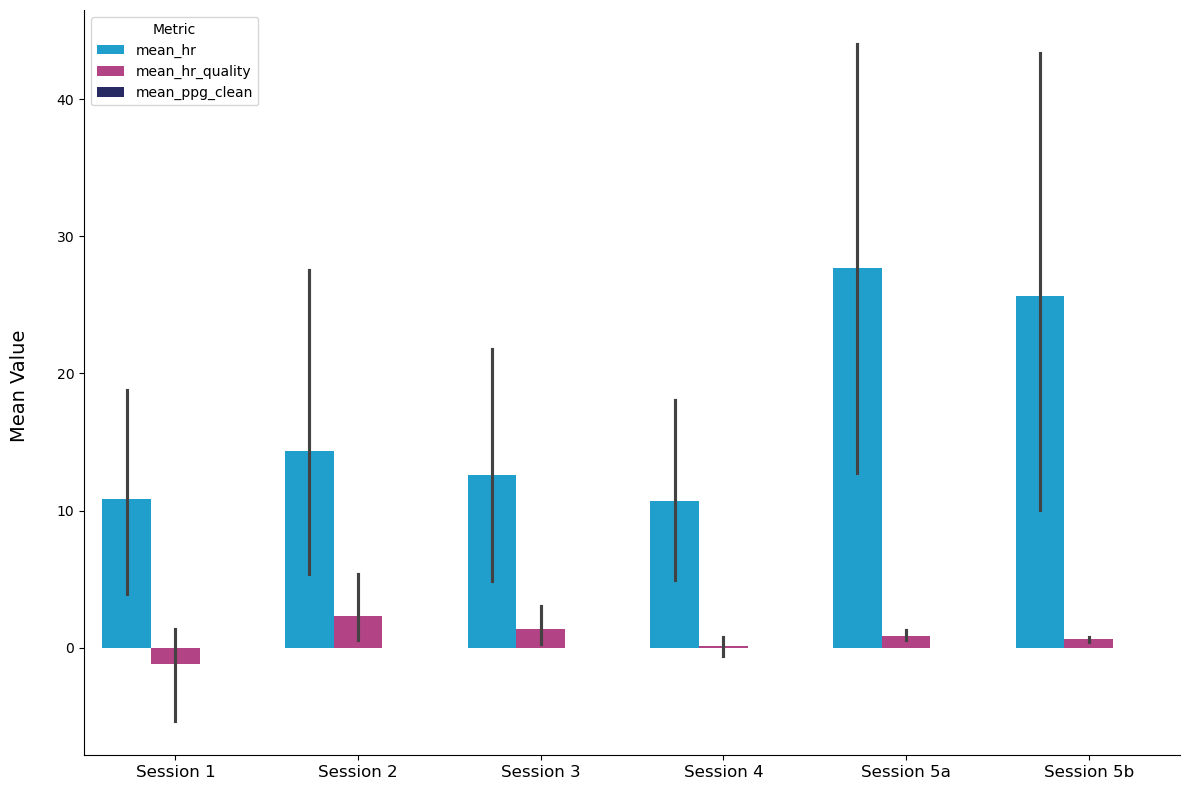

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directories
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Define sessions and their labels
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

# Loop through each session and calculate means for HR, HR Quality, and PPG_Clean
for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Calculate mean heart rate, heart rate quality, and PPG_Clean
                mean_hr = df_session['PPG_Rate'].mean()
                mean_hr_quality = df_session['PPG_Quality'].mean()
                mean_ppg_clean = df_session['PPG_Clean'].mean()

                # Store all three metrics
                session_means[session_name].append([sub_dir, mean_hr, mean_hr_quality, mean_ppg_clean])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_hr', 'mean_hr_quality', 'mean_ppg_clean'])

# Concatenate all sessions into one DataFrame
all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

# Order the subjects and fill any missing values with the mean
subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_hr'].fillna(df_all_sessions['mean_hr'].mean(), inplace=True)
df_all_sessions['mean_hr_quality'].fillna(df_all_sessions['mean_hr_quality'].mean(), inplace=True)
df_all_sessions['mean_ppg_clean'].fillna(df_all_sessions['mean_ppg_clean'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])

# Melt the DataFrame for easier plotting (long format)
df_melted = pd.melt(df_all_sessions, id_vars=['subject', 'session'], value_vars=['mean_hr', 'mean_hr_quality', 'mean_ppg_clean'], 
                    var_name='Metric', value_name='Value')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

# Create the grouped bar plot using 'hue' for HR, HR Quality, and PPG Clean
sns.barplot(data=df_melted, x='session', y='Value', hue='Metric', palette=['#05ace8', '#c53088', '#1e226c'])
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Value \n', fontsize=14)
plt.tight_layout()
sns.despine()

# Uncomment below to save the figure
# plt.savefig(f"{fig_dir}/grouped-hr-hrquality-clean-session-means.png", dpi=300)

plt.show()
